# Shapley值及其应用

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('process_heart.csv')

# 划分特征和标签
X = df.drop('target',axis=1)
y = df['target']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 构建随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

# 在测试集上预测
y_predict = model.predict(X_test)
y_predict_proba=model.predict_proba(X_test)

In [2]:
import shap
shap.initjs()

# shap值计算

In [3]:
explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)

In [4]:
len(shap_values)

2

In [5]:
shap_values[0].shape
# 不患病结果shap值

(61, 26)

In [6]:
shap_values[1].shape
# 患病结果shap值

(61, 26)

In [7]:
shap_values[0]

array([[ 5.43681900e-03,  3.24174900e-03,  1.09295944e-02, ...,
        -1.41381506e-04,  6.50927169e-02, -4.07168630e-05],
       [ 2.02072643e-02, -1.18462879e-02, -6.42651287e-03, ...,
        -6.21247639e-04,  3.19225973e-02, -5.29173856e-05],
       [ 1.71808200e-02, -5.21640210e-03,  2.66711451e-02, ...,
        -1.00433787e-03,  5.91605654e-02, -9.77972166e-05],
       ...,
       [-8.40437180e-03, -2.48317722e-04,  6.94944683e-03, ...,
        -4.14057566e-04,  5.09875835e-02, -3.20444232e-05],
       [ 5.30044717e-03,  2.94975502e-03, -1.63064528e-02, ...,
        -8.30371364e-04,  4.94928219e-02, -3.25959052e-05],
       [-5.79203814e-03, -8.52274780e-05, -2.71386929e-02, ...,
        -2.17139309e-04,  5.69496857e-02, -4.52292570e-06]])

In [8]:
shap_values[1]

array([[-5.43681900e-03, -3.24174900e-03, -1.09295944e-02, ...,
         1.41381506e-04, -6.50927169e-02,  4.07168630e-05],
       [-2.02072643e-02,  1.18462879e-02,  6.42651287e-03, ...,
         6.21247639e-04, -3.19225973e-02,  5.29173856e-05],
       [-1.71808200e-02,  5.21640210e-03, -2.66711451e-02, ...,
         1.00433787e-03, -5.91605654e-02,  9.77972166e-05],
       ...,
       [ 8.40437180e-03,  2.48317722e-04, -6.94944683e-03, ...,
         4.14057566e-04, -5.09875835e-02,  3.20444232e-05],
       [-5.30044717e-03, -2.94975502e-03,  1.63064528e-02, ...,
         8.30371364e-04, -4.94928219e-02,  3.25959052e-05],
       [ 5.79203814e-03,  8.52274780e-05,  2.71386929e-02, ...,
         2.17139309e-04, -5.69496857e-02,  4.52292570e-06]])

In [9]:
expected_value=explainer.expected_value
# 平均概率

In [10]:
explainer.expected_value[0]+explainer.expected_value[1]
# 概率之和

0.9999999999999998

In [11]:
shap_values[1].sum(axis=1).shape

(61,)

In [12]:
y_pred_proba_shap=shap_values[1].sum(axis=1)+explainer.expected_value[1]

In [13]:
y_pred_proba_shap.shape

(61,)

In [14]:
y_pred_proba_shap

array([0.06581409, 0.42205708, 0.28276926, 0.78255433, 0.28330196,
       0.71744817, 0.58375049, 0.65463488, 0.92281947, 0.10083558,
       0.88569912, 0.1314329 , 0.64667811, 0.84994744, 0.20706934,
       0.83200874, 0.11247107, 0.01126277, 0.65991717, 0.20649077,
       0.10997899, 0.84310326, 0.6982717 , 0.89397118, 0.33054133,
       0.14019894, 0.01303658, 0.08183782, 0.88701779, 0.00607688,
       0.89290251, 0.23375346, 0.16849296, 0.21216192, 0.00392086,
       0.08633593, 0.78387512, 0.46184181, 0.8530786 , 0.28419003,
       0.05655939, 0.22225011, 0.86202438, 0.54970151, 0.9467253 ,
       0.43085195, 0.5314137 , 0.83960311, 0.73132274, 0.41968031,
       0.48683373, 0.85093356, 0.05688033, 0.16251312, 0.89439332,
       0.77977953, 0.80084864, 0.72746782, 0.00867761, 0.03314983,
       0.66484173])

In [15]:
model.predict_proba(X_test)

array([[0.93418591, 0.06581409],
       [0.57794292, 0.42205708],
       [0.71723074, 0.28276926],
       [0.21744567, 0.78255433],
       [0.71669804, 0.28330196],
       [0.28255183, 0.71744817],
       [0.41624951, 0.58375049],
       [0.34536512, 0.65463488],
       [0.07718053, 0.92281947],
       [0.89916442, 0.10083558],
       [0.11430088, 0.88569912],
       [0.8685671 , 0.1314329 ],
       [0.35332189, 0.64667811],
       [0.15005256, 0.84994744],
       [0.79293066, 0.20706934],
       [0.16799126, 0.83200874],
       [0.88752893, 0.11247107],
       [0.98873723, 0.01126277],
       [0.34008283, 0.65991717],
       [0.79350923, 0.20649077],
       [0.89002101, 0.10997899],
       [0.15689674, 0.84310326],
       [0.3017283 , 0.6982717 ],
       [0.10602882, 0.89397118],
       [0.66945867, 0.33054133],
       [0.85980106, 0.14019894],
       [0.98696342, 0.01303658],
       [0.91816218, 0.08183782],
       [0.11298221, 0.88701779],
       [0.99392312, 0.00607688],
       [0.

In [16]:
model.predict_proba(X_test)[:,1]

array([0.06581409, 0.42205708, 0.28276926, 0.78255433, 0.28330196,
       0.71744817, 0.58375049, 0.65463488, 0.92281947, 0.10083558,
       0.88569912, 0.1314329 , 0.64667811, 0.84994744, 0.20706934,
       0.83200874, 0.11247107, 0.01126277, 0.65991717, 0.20649077,
       0.10997899, 0.84310326, 0.6982717 , 0.89397118, 0.33054133,
       0.14019894, 0.01303658, 0.08183782, 0.88701779, 0.00607688,
       0.89290251, 0.23375346, 0.16849296, 0.21216192, 0.00392086,
       0.08633593, 0.78387512, 0.46184181, 0.8530786 , 0.28419003,
       0.05655939, 0.22225011, 0.86202438, 0.54970151, 0.9467253 ,
       0.43085195, 0.5314137 , 0.83960311, 0.73132274, 0.41968031,
       0.48683373, 0.85093356, 0.05688033, 0.16251312, 0.89439332,
       0.77977953, 0.80084864, 0.72746782, 0.00867761, 0.03314983,
       0.66484173])

# 特征重要度可视化

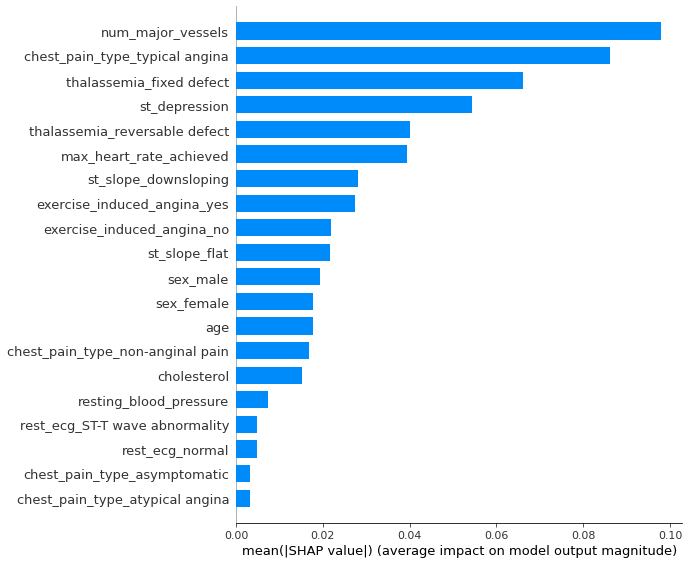

In [17]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# 特征值大小与其shap值大小的关系

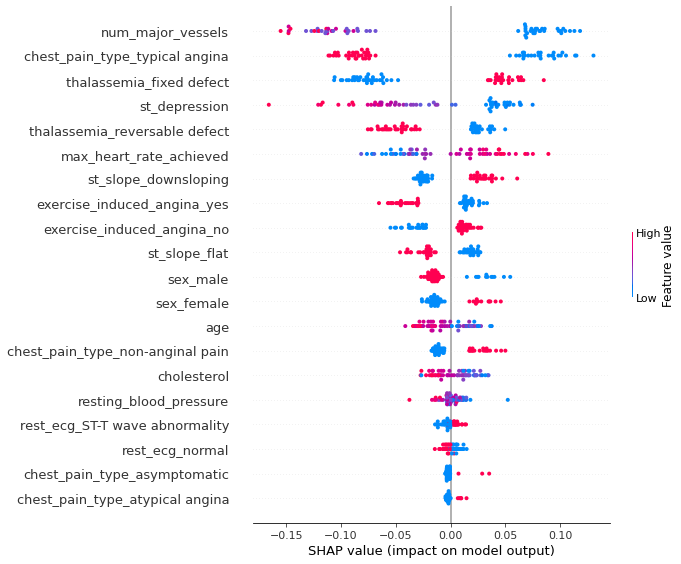

In [18]:
shap.summary_plot(shap_values[1], X_test)

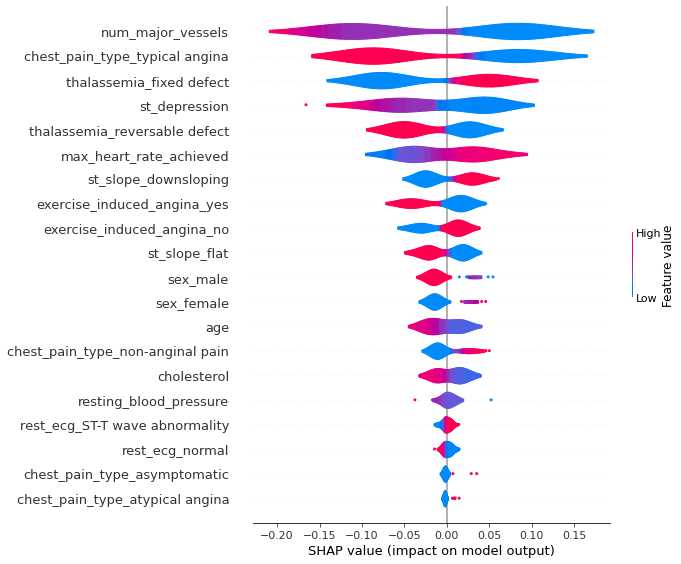

In [19]:
shap.summary_plot(shap_values[1], X_test, plot_type="violin")

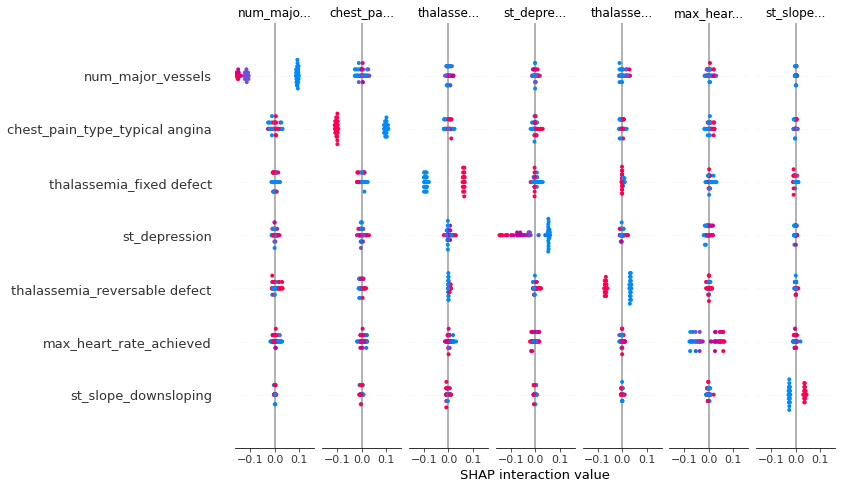

In [20]:
shap_interaction_values=explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[1], X_test)

# 单个样本个特征对预测“患病”结果的影响

In [21]:
X_test.head(10)

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
246   56                     134          409                      150   
183   58                     112          230                      165   
229   64                     125          309                      131   
126   47                     112          204                      143   
184   50                     150          243                      128   
1     37                     130          250                      187   
59    57                     128          303                      159   
194   60                     140          185                      155   
132   42                     120          295                      162   
175   40                     110          167                      114   

     st_depression  num_major_vessels  sex_female  sex_male  \
246            1.9                  2           1         0   
183            2.5                  1           0         1   
229            1.8                  0           0         1   
126            0.1                  0           0         1   
184            2.6                  0           0         1   
1              3.5                  0           0         1   
59             0.0                  1           1         0   
194            3.0                  0           0         1   
132            0.0                  0           0         1   
175            2.0                  0           0         1   

     chest_pain_type_asymptomatic  chest_pain_type_atypical angina  ...  \
246                             0                                0  ...   
183                             0                                0  ...   
229                             0                                0  ...   
126                             0                                0  ...   
184                             0                                0  ...   
1                               0                                0  ...   
59                              0                                0  ...   
194                             0                                0  ...   
132                             0                                1  ...   
175                             0                                0  ...   

     rest_ecg_normal  exercise_induced_angina_no  exercise_induced_angina_yes  \
246                1                           0                            1   
183                1                           1                            0   
229                0                           0                            1   
126                0                           1                            0   
184                1                           1                            0   
1                  0                           1                            0   
59                 1                           1                            0   
194                1                           1                            0   
132                0                           1                            0   
175                1                           0                            1   

     st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
246                     0              1                   0   
183                     0              1                   0   
229                     0              1                   0   
126                     1              0                   0   
184                     0              1                   0   
1                       0              0                   1   
59                      1              0                   0   
194                     0              1                   0   
132                     1              0                   0   
175                     0              1                   0   

     thalassemia_fixed defect  thalassemia_normal  \
246                 

In [22]:
idx=12
patient=X.iloc[idx, :]

In [23]:
patient

age                                           49.0
resting_blood_pressure                       130.0
cholesterol                                  266.0
max_heart_rate_achieved                      171.0
st_depression                                  0.6
num_major_vessels                              0.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                1.0
chest_pain_type_non-anginal pain               0.0
chest_pain_type_typical angina                 0.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_no                     1.0
exercise_induced_angina_yes                    0.0
st_slope_downsloping           

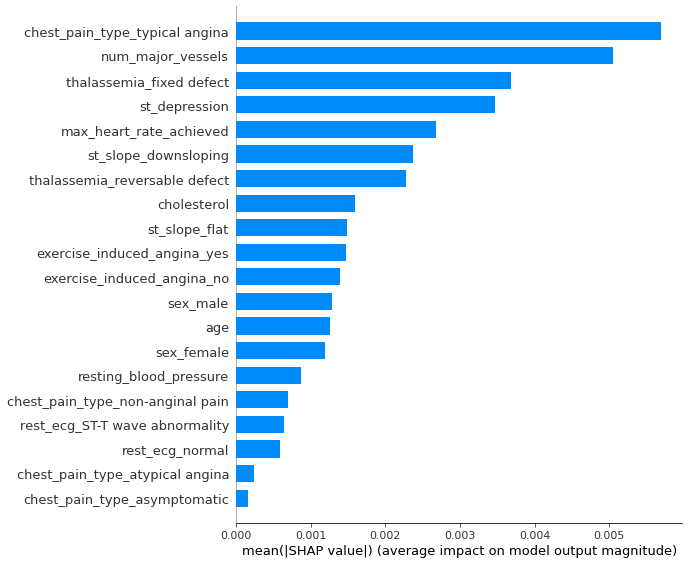

In [24]:
shap.summary_plot(shap_interaction_values[1][3], X_test, plot_type="bar")

In [25]:
shap_values_patient=explainer.shap_values(patient)

In [26]:
shap_values_patient

[array([-1.87112514e-02, -6.35354313e-03,  3.96279622e-03, -4.61849897e-02,
        -2.86102786e-02, -7.47630924e-02,  1.25482189e-02,  1.47251401e-02,
         9.78085602e-04, -7.51892670e-03,  6.34784519e-03, -6.82962042e-02,
        -4.09878340e-04,  1.94754722e-05, -5.67674175e-03, -1.80574306e-04,
        -4.98516027e-03, -1.11667444e-02, -1.26781228e-02, -2.63687604e-02,
        -1.59440315e-02, -5.46493503e-05, -4.83968578e-02, -2.63144561e-03,
        -2.45211738e-02, -2.39431428e-05]),
 array([ 1.87112514e-02,  6.35354313e-03, -3.96279622e-03,  4.61849897e-02,
         2.86102786e-02,  7.47630924e-02, -1.25482189e-02, -1.47251401e-02,
        -9.78085602e-04,  7.51892670e-03, -6.34784519e-03,  6.82962042e-02,
         4.09878340e-04, -1.94754722e-05,  5.67674175e-03,  1.80574306e-04,
         4.98516027e-03,  1.11667444e-02,  1.26781228e-02,  2.63687604e-02,
         1.59440315e-02,  5.46493503e-05,  4.83968578e-02,  2.63144561e-03,
         2.45211738e-02,  2.39431428e-05])]

In [27]:
shap_values_patient[0]

array([-1.87112514e-02, -6.35354313e-03,  3.96279622e-03, -4.61849897e-02,
       -2.86102786e-02, -7.47630924e-02,  1.25482189e-02,  1.47251401e-02,
        9.78085602e-04, -7.51892670e-03,  6.34784519e-03, -6.82962042e-02,
       -4.09878340e-04,  1.94754722e-05, -5.67674175e-03, -1.80574306e-04,
       -4.98516027e-03, -1.11667444e-02, -1.26781228e-02, -2.63687604e-02,
       -1.59440315e-02, -5.46493503e-05, -4.83968578e-02, -2.63144561e-03,
       -2.45211738e-02, -2.39431428e-05])

In [28]:
shap_values_patient[1]

array([ 1.87112514e-02,  6.35354313e-03, -3.96279622e-03,  4.61849897e-02,
        2.86102786e-02,  7.47630924e-02, -1.25482189e-02, -1.47251401e-02,
       -9.78085602e-04,  7.51892670e-03, -6.34784519e-03,  6.82962042e-02,
        4.09878340e-04, -1.94754722e-05,  5.67674175e-03,  1.80574306e-04,
        4.98516027e-03,  1.11667444e-02,  1.26781228e-02,  2.63687604e-02,
        1.59440315e-02,  5.46493503e-05,  4.83968578e-02,  2.63144561e-03,
        2.45211738e-02,  2.39431428e-05])

In [29]:
shap_values_patient[0]+shap_values_patient[1]

array([-6.93889390e-18, -6.07153217e-18,  8.67361738e-18, -4.16333634e-17,
        1.38777878e-17, -8.32667268e-17, -8.67361738e-18, -5.20417043e-18,
        2.16840434e-19,  4.33680869e-18,  3.46944695e-18, -6.93889390e-17,
        8.13151629e-19, -1.18584613e-19,  0.00000000e+00,  5.42101086e-20,
        2.60208521e-18, -6.93889390e-18,  8.67361738e-18,  1.38777878e-17,
        3.46944695e-18,  2.71050543e-20,  6.93889390e-18, -2.16840434e-18,
        3.81639165e-17,  7.79270311e-20])

In [30]:
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)
# 红色：正向贡献
# 蓝色：负向贡献

# Summary Plot
* 将测试集所有样本的force plot旋转九十度并拼接在一起，形成summary plot

In [31]:
# summary plot
number_show=60
shap_values_summary=explainer.shap_values(X_train.iloc[:number_show])
shap.force_plot(explainer.expected_value[1], shap_values_summary[1], X_test.iloc[:number_show])

# Dependence Plot

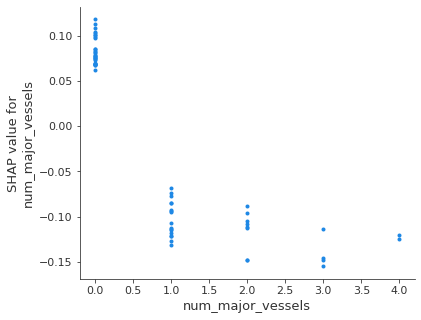

In [32]:
shap.dependence_plot("num_major_vessels", shap_values[1], X_test, interaction_index=None)

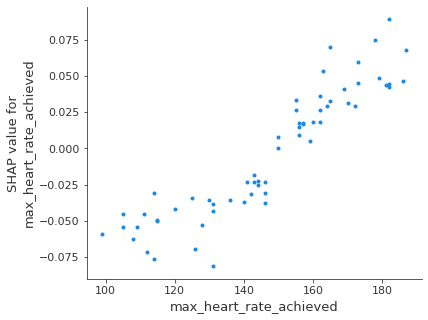

In [33]:
shap.dependence_plot("max_heart_rate_achieved", shap_values[1], X_test, interaction_index=None)

# Partial Dependence Plot
* 展示某特征从小变大时模型预测的结果

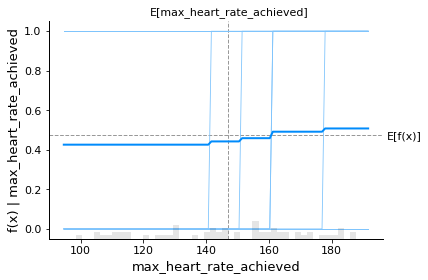

In [34]:
shap.partial_dependence_plot("max_heart_rate_achieved", model.predict, X_test, model_expected_value=True, feature_expected_value=True)

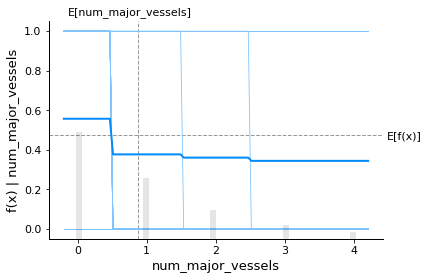

In [35]:
shap.partial_dependence_plot("num_major_vessels", model.predict, X_test, model_expected_value=True, feature_expected_value=True)

# 决策图
* 展示测试集所有数据的决策过程

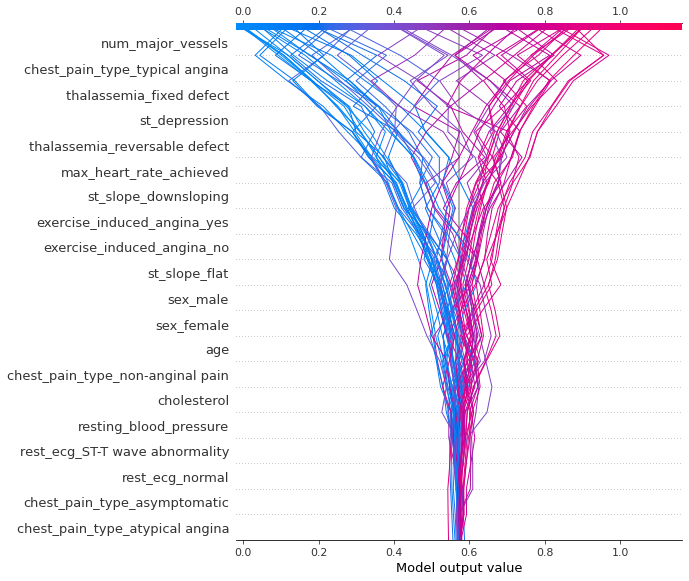

In [36]:
shap.decision_plot(expected_value[1], shap_values[1], X_test)

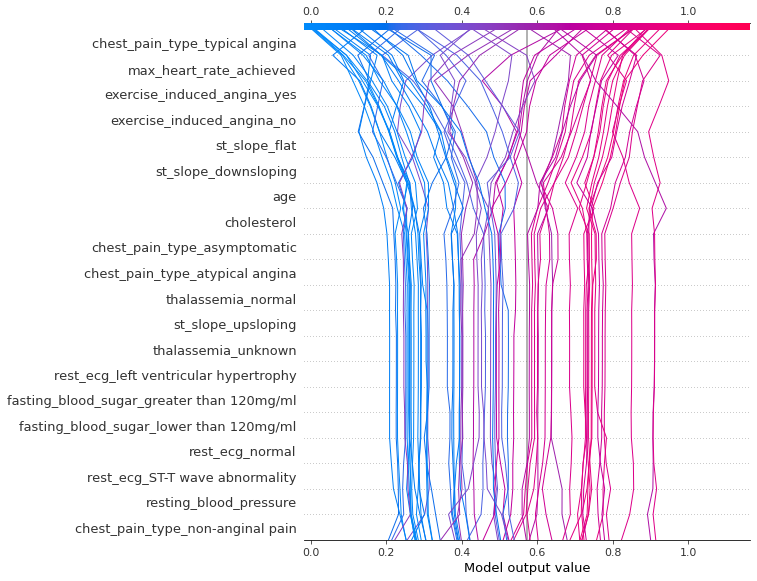

In [37]:
shap.decision_plot(expected_value[1], shap_values[1], X_test, feature_order='hclust')

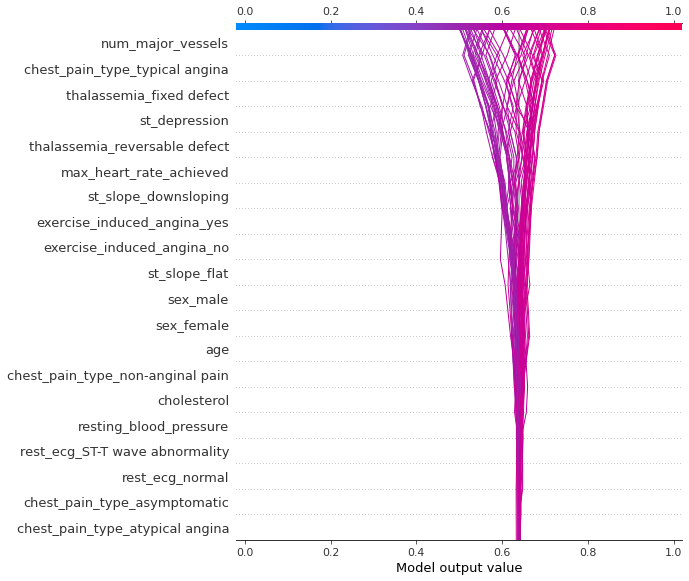

In [38]:
shap.decision_plot(expected_value[1], shap_values[1], X_test, link='logit')

# 单个样本决策图

样本索引号: 27 ，原始数据集X中索引号： 186 


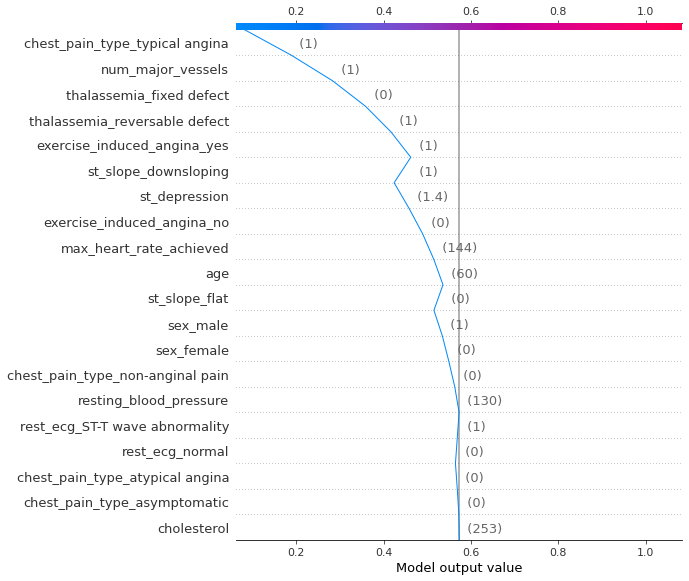

In [39]:
idx = 27
selection = np.zeros((61))
selection[idx] = 1
selection = selection > 0

print('样本索引号: {} ，原始数据集X中索引号： {} '.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(expected_value[1], shap_values[1][selection], X_test[selection])

# 自定义决策图特征显示顺序

In [40]:
X_test.shape

(61, 26)

In [41]:
feature_idx = [i for i in range(26)]

In [42]:
feature_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

样本索引号: 27 ，原始数据集X中索引号： 186 


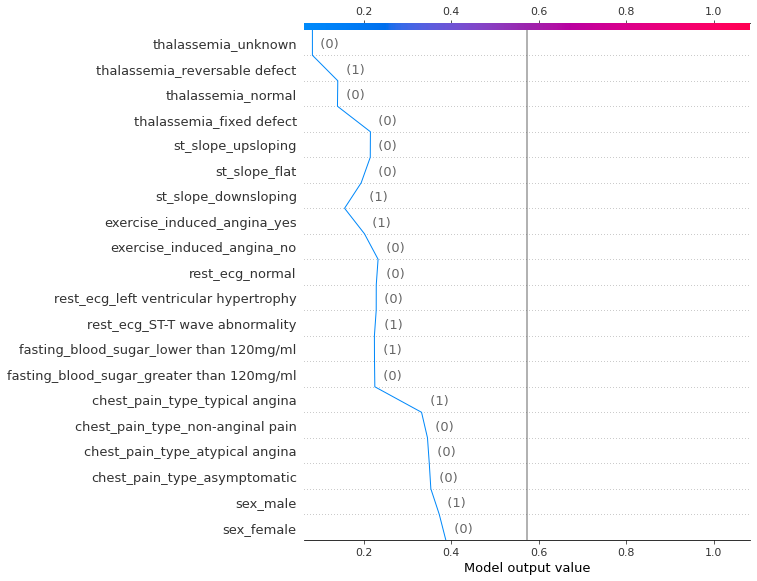

In [43]:
idx = 27
selection = np.zeros((61))
selection[idx] = 1
selection = selection > 0

print('样本索引号: {} ，原始数据集X中索引号： {} '.format(idx,X_test.iloc[idx:idx+1].index[0]))
shap.decision_plot(expected_value[1], shap_values[1][selection], X_test[selection], feature_order=feature_idx)

# 选出测试集中错误的样本

In [44]:
misclassified = y_predict != y_test
misclassified_df = pd.DataFrame({'是否预测错误':misclassified})

In [45]:
misclassified_df

是否预测错误
246   False
183   False
229   False
126   False
184   False
..      ...
277    True
121   False
187   False
301   False
283    True

[61 rows x 1 columns]

In [46]:
misclassified_df = misclassified_df[misclassified_df['是否预测错误'] == True]

In [47]:
misclassified_df

是否预测错误
194    True
296    True
139    True
287    True
52     True
138    True
188    True
259    True
106    True
277    True
283    True

In [48]:
idx = 173

patient = X.iloc[idx,:]
patient_df = X.loc[idx:idx]
model_predict_proba = model.predict_proba(patient_df)[0][1]
print('{}号病人的真实标签是 {} ，模型预测为 {:.2f} '.format(idx, bool(y_test[idx]), model_predict_proba))

shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

173号病人的真实标签是 False ，模型预测为 0.49 


In [49]:
idx = 52

patient = X.iloc[idx,:]
patient_df = X.loc[idx:idx]
model_predict_proba = model.predict_proba(patient_df)[0][1]
print('{}号病人的真实标签是 {} ，模型预测为 {:.2f} '.format(idx, bool(y_test[idx]), model_predict_proba))

shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

52号病人的真实标签是 True ，模型预测为 0.23 


# 显示预测错误的样本
* 红线：假正例（没患病的病人被模型错误分类为患病）
* 蓝线；假反例（患病病人被模型错误分类为不患病）

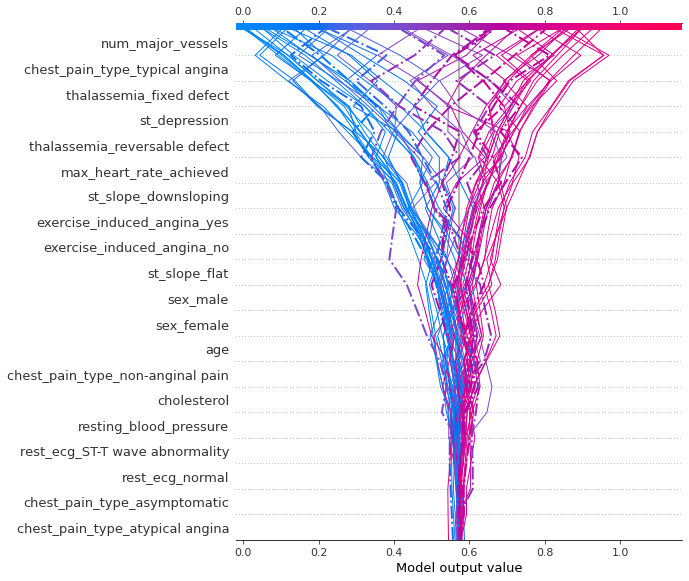

In [50]:
shap.decision_plot(expected_value[1], shap_values[1], X_test, highlight=misclassified)

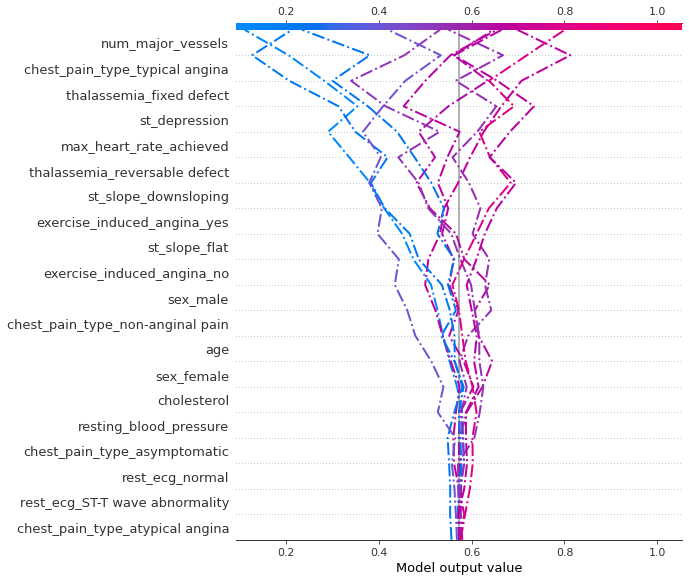

In [51]:
shap.decision_plot(expected_value[1], shap_values[1][misclassified], X_test[misclassified], highlight=range(len(misclassified_df)))

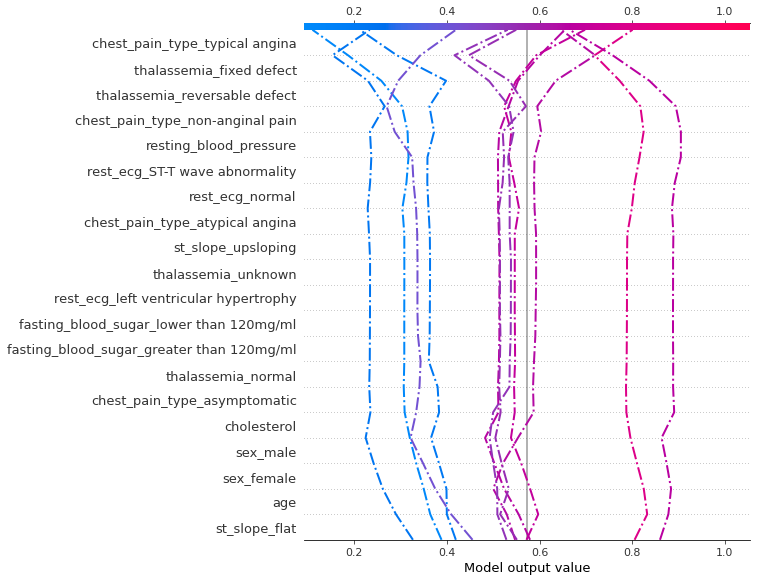

In [52]:
shap.decision_plot(expected_value[1], shap_values[1][misclassified], X_test[misclassified], highlight=range(len(misclassified_df)),feature_order='hclust')

# 探究两两交互特征对预测结果的影响

In [53]:
shap_interaction_values = explainer.shap_interaction_values(X_test)

In [54]:
shap_interaction_values[1].shape

(61, 26, 26)

In [55]:
shap_interaction_values[0].shape

(61, 26, 26)

In [56]:
shap_interaction_values[1].shape

(61, 26, 26)

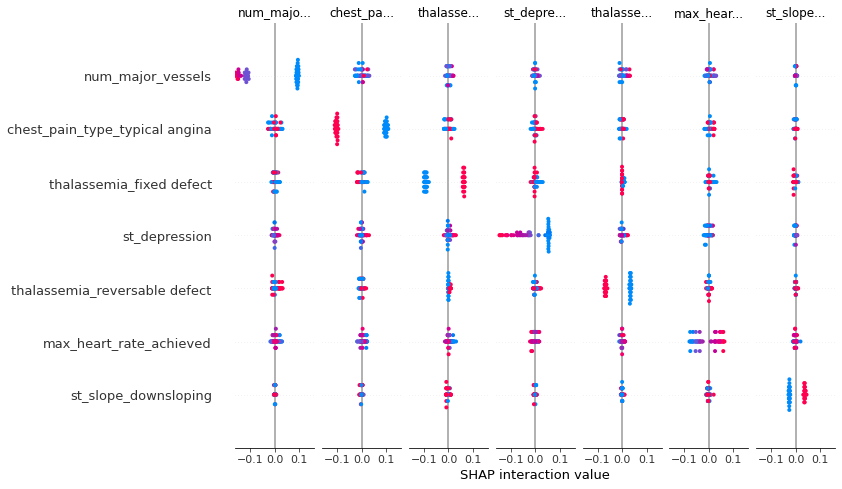

In [57]:
shap.summary_plot(shap_interaction_values[1],X_test)

In [58]:
shap_interaction_values[1][5].shape

(26, 26)

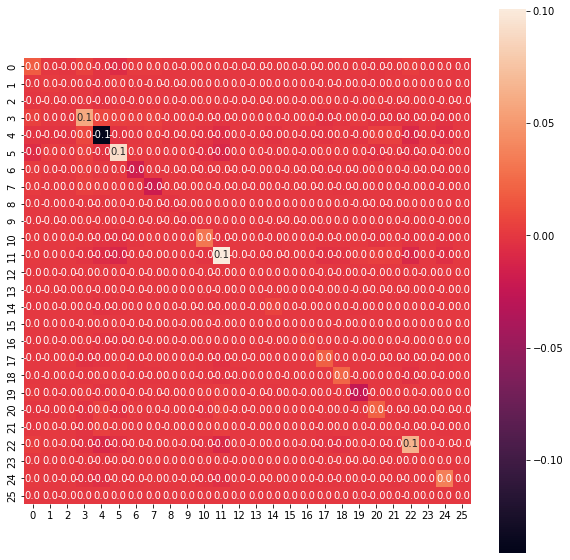

In [59]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(shap_interaction_values[1][5],annot=True,fmt='.1f',square=True)
plt.show()

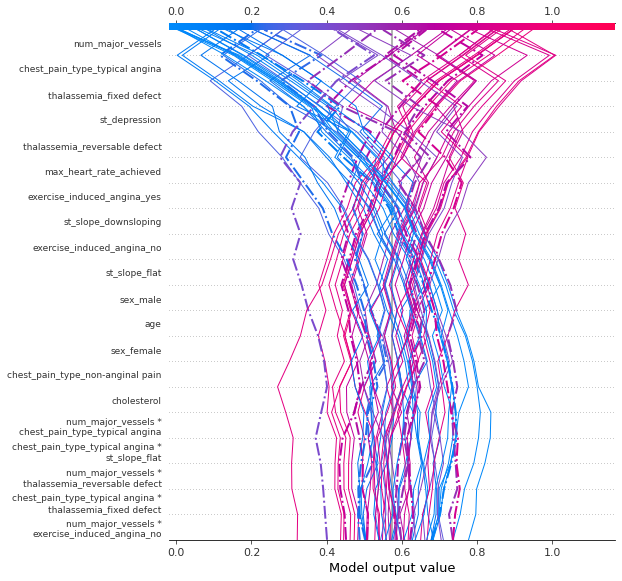

In [60]:
shap.decision_plot(expected_value[1], shap_interaction_values[1], X_test, highlight=misclassified)

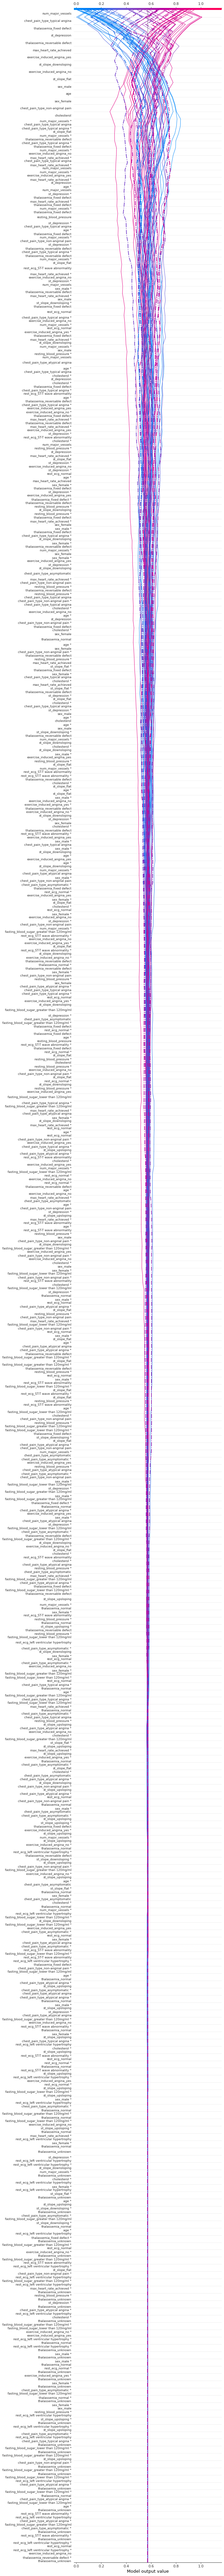

In [61]:
shap.decision_plot(expected_value[1], shap_interaction_values[1], X_test, highlight=misclassified, feature_display_range=slice(None, None, -1), ignore_warnings=True)

# 两两交互特征中的单个样本决策图

索引号为 27 的样本，在原始数据集X中的索引号为 186 


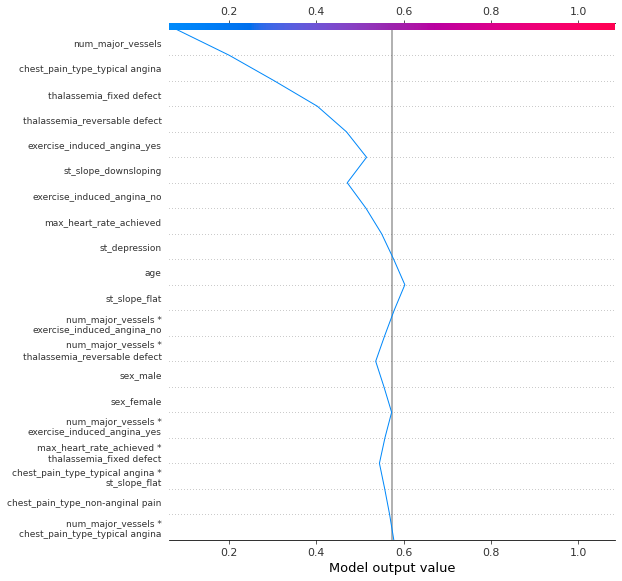

In [62]:
idx = 27
selection = np.zeros((61))
selection[idx] = 1
selection = selection > 0

print('索引号为 {} 的样本，在原始数据集X中的索引号为 {} '.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(expected_value[1], shap_interaction_values[1][selection], X_test[selection])

索引号为 27 的样本，在原始数据集X中的索引号为 186 


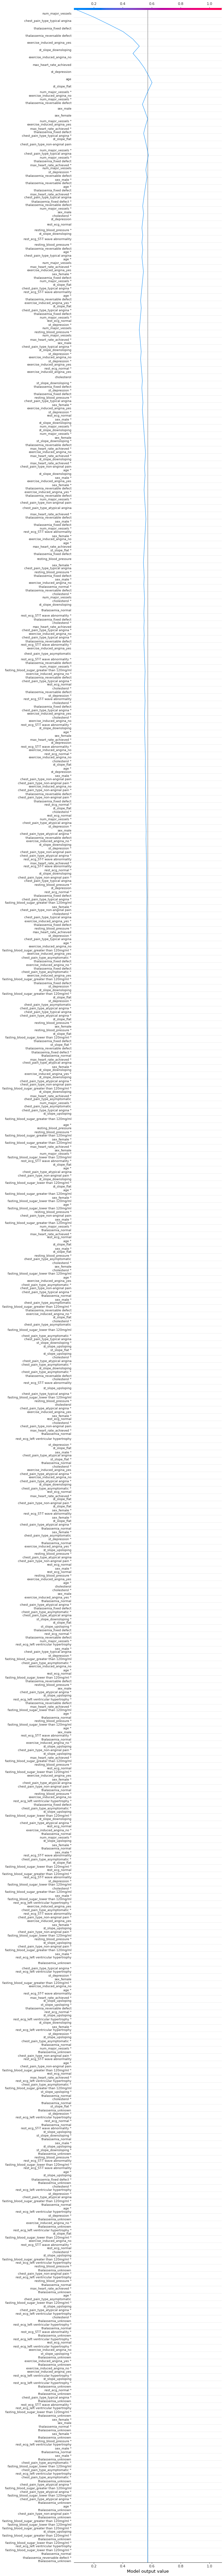

In [63]:
idx = 27
selection = np.zeros((61))
selection[idx] = 1
selection = selection > 0

print('索引号为 {} 的样本，在原始数据集X中的索引号为 {} '.format(idx,X_test.iloc[idx:idx+1].index[0]))

shap.decision_plot(expected_value[1], shap_interaction_values[1][selection], X_test[selection], feature_display_range=slice(None, None, -1), ignore_warnings=True)

# 以25号病人为例：

In [64]:
X_test

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
246   56                     134          409                      150   
183   58                     112          230                      165   
229   64                     125          309                      131   
126   47                     112          204                      143   
184   50                     150          243                      128   
..   ...                     ...          ...                      ...   
277   57                     124          261                      141   
121   59                     138          271                      182   
187   54                     124          266                      109   
301   57                     130          131                      115   
283   40                     152          223                      181   

     st_depression  num_major_vessels  sex_female  sex_male  \
246            1.9                  2           1         0   
183            2.5                  1           0         1   
229            1.8                  0           0         1   
126            0.1                  0           0         1   
184            2.6                  0           0         1   
..             ...                ...         ...       ...   
277            0.3                  0           0         1   
121            0.0                  0           0         1   
187            2.2                  1           0         1   
301            1.2                  1           0         1   
283            0.0                  0           0         1   

     chest_pain_type_asymptomatic  chest_pain_type_atypical angina  ...  \
246                             0                                0  ...   
183                             0                                0  ...   
229                             0                                0  ...   
126                             0                                0  ...   
184                             0                                0  ...   
..                            ...                              ...  ...   
277                             0                                1  ...   
121                             0                                0  ...   
187                             0                                0  ...   
301                             0                                0  ...   
283                             0                                0  ...   

     rest_ecg_normal  exercise_induced_angina_no  exercise_induced_angina_yes  \
246                1                           0                            1   
183                1                           1                            0   
229                0                           0                            1   
126                0                           1                            0   
184                1                           1                            0   
..               ...                         ...                          ...   
277                0                           1                            0   
121                1                           1                            0   
187                1                           0                            1   
301                0                           0                            1   
283                0                           1                            0   

     st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
246                     0              1                   0   
183                     0              1                   0   
229                     0              1                   0   
126                     1              0                   0   
184                     0              1                   0   
..                    ...            ...                 ...   
277                     1            

In [65]:
idx = 25
X_test.loc[idx]

age                                           71.0
resting_blood_pressure                       160.0
cholesterol                                  302.0
max_heart_rate_achieved                      162.0
st_depression                                  0.4
num_major_vessels                              2.0
sex_female                                     1.0
sex_male                                       0.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                1.0
chest_pain_type_non-anginal pain               0.0
chest_pain_type_typical angina                 0.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_no                     1.0
exercise_induced_angina_yes                    0.0
st_slope_downsloping           

In [66]:
print('索引号为 {} 的样本，在原始数据集X中的索引号为 {} '.format(idx,X_test.iloc[idx:idx+1].index[0]))

索引号为 25 的样本，在原始数据集X中的索引号为 240 


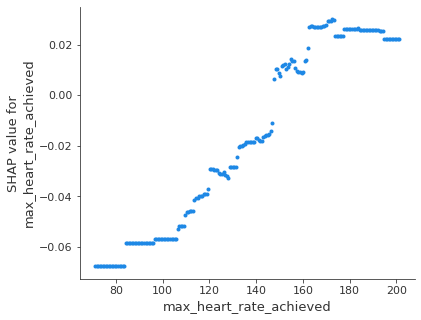

In [67]:
feature_selected = 'max_heart_rate_achieved'
sep = 200
feature_selected_min = X[feature_selected].min()
feature_selected_max = X[feature_selected].max()
step = (feature_selected_max - feature_selected_min)/sep
rg = np.arange(feature_selected_min, feature_selected_max, step)
R = X.iloc[np.repeat(idx, len(rg))].reset_index(drop=True)
R[feature_selected] = rg
hypothetical_shap_values = explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected, hypothetical_shap_values, R, interaction_index=None)

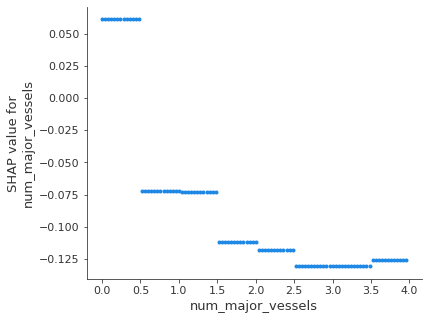

In [68]:
feature_selected = 'num_major_vessels'
sep = 100
feature_selected_min = X[feature_selected].min()
feature_selected_max = X[feature_selected].max()
step = (feature_selected_max - feature_selected_min)/sep
rg = np.arange(feature_selected_min, feature_selected_max, step)
R = X.iloc[np.repeat(idx, len(rg))].reset_index(drop=True)
R[feature_selected] = rg
hypothetical_shap_values = explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected, hypothetical_shap_values, R, interaction_index=None)

* **25号病人某特征不同变化范围的决策图**

In [69]:
hypothetical_shap_values.shape

(100, 26)

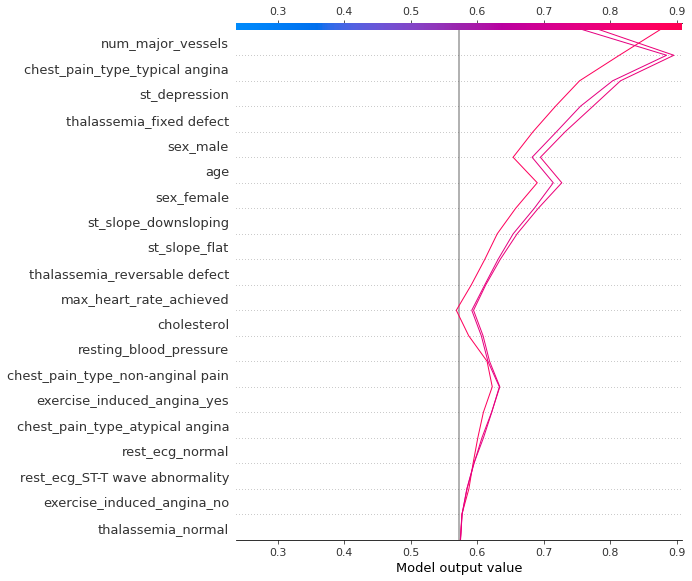

In [70]:
idx = 25
shap.decision_plot(expected_value[1], hypothetical_shap_values[[0,50,99]], X_test.iloc[idx], feature_order='importance')

# 找出受st_depression特征影响最大的病人

In [71]:
X_test['st_depression'].unique()

array([1.9, 2.5, 1.8, 0.1, 2.6, 3.5, 0. , 3. , 2. , 1. , 3.4, 1.4, 0.2,
       1.6, 0.8, 2.9, 2.2, 3.6, 1.5, 2.8, 0.4, 3.1, 0.6, 3.8, 3.2, 2.1,
       1.2, 0.3])

In [72]:
idx = np.argpartition(shap_values[1][:, X_test.columns.get_loc('st_depression')], 2)

In [73]:
idx.shape

(61,)

In [74]:
idx

array([ 5,  7, 32,  3,  4,  0,  6,  1,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  2, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [76]:
idx = 5
patient = X_test.iloc[idx,:]
shap_values_patient = explainer.shap_values(patient)
shap.waterfall_plot(explainer.expected_value[1], shap_values_patient[1], patient)

AttributeError: 'numpy.float64' object has no attribute 'base_values'

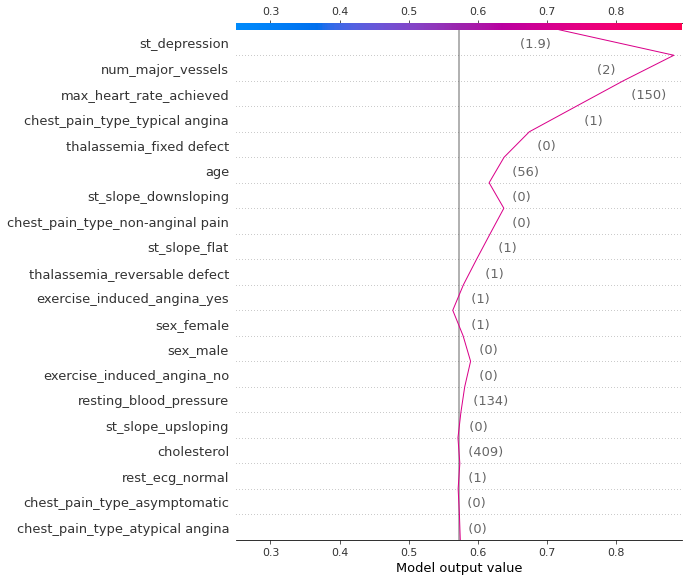

In [77]:
shap.decision_plot(expected_value[1], shap_values[1][5], X_test, feature_order='importance')

In [78]:
idx = 32
patient = X_test.iloc[idx,:]
shap_values_patient = explainer.shap_values(patient)
shap.waterfall_plot(explainer.expected_value[1], shap_values_patient[1], patient)

AttributeError: 'numpy.float64' object has no attribute 'base_values'

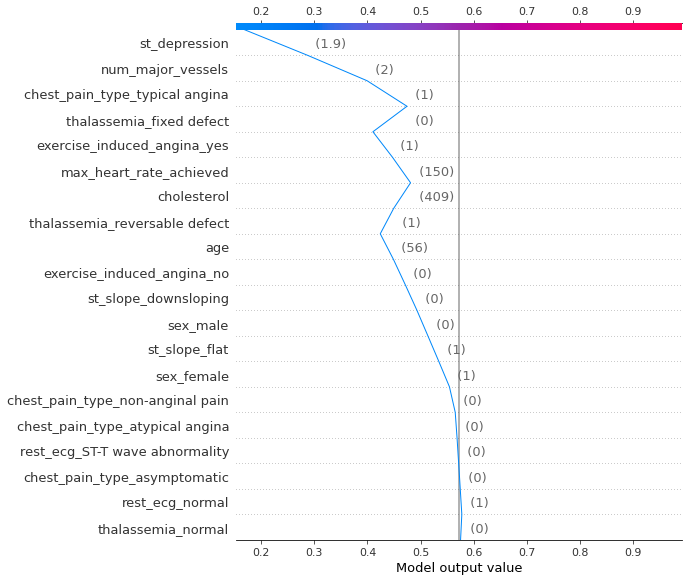

In [79]:
shap.decision_plot(expected_value[1], shap_values[1][32], X_test, feature_order='importance')

# 找出受max_heart_rate_achieved特征影响最大的病人

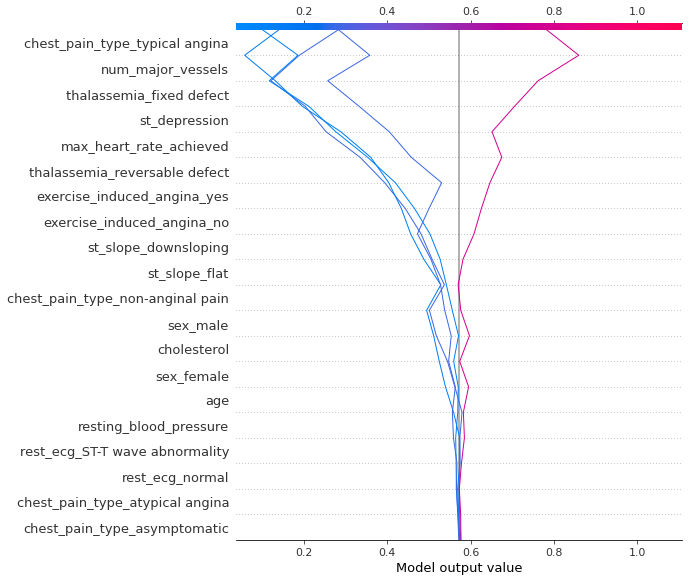

In [80]:
feature = 'max_heart_rate_achieved'
num_show = 5
idx = np.argpartition(shap_values[1][:, X_test.columns.get_loc(feature)], 2)
shap.decision_plot(expected_value[1], shap_values[1][idx[0:num_show]], X_test, feature_order='importance')

# 找出受num_major_vessels特征影响最大的病人

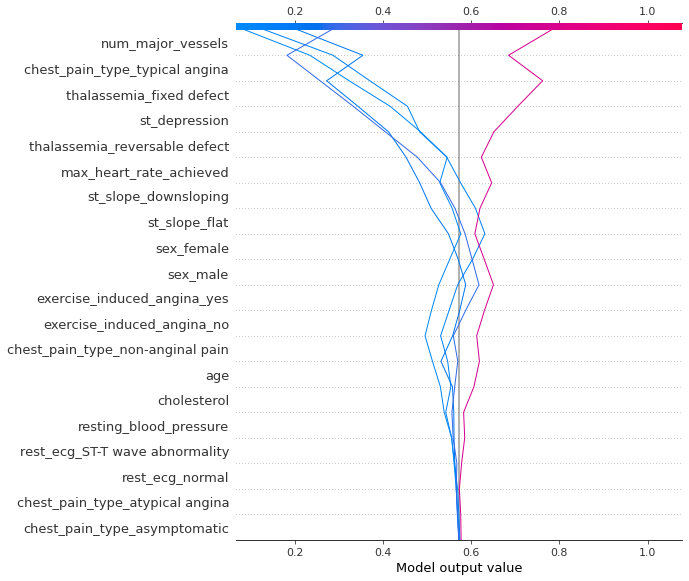

In [81]:
feature = 'num_major_vessels'
num_show = 5
idx = np.argpartition(shap_values[1][:, X_test.columns.get_loc(feature)], 2)
shap.decision_plot(expected_value[1], shap_values[1][idx[0:num_show]], X_test, feature_order='importance')